In [2]:
import numpy as np
import kwant
from matplotlib import pyplot as plt

import scipy.linalg as la
from scipy.constants import physical_constants

ModuleNotFoundError: No module named 'numpy'

In [25]:
h_bar = physical_constants['Planck constant over 2 pi'][0]
h_bar_eV = physical_constants['Planck constant over 2 pi in eV s'][0]
m_el = physical_constants['electron mass'][0]
eV = physical_constants['electron volt'][0]

In [26]:
a=1.0e-9
a_nm = a*10**9
N = 100

t=(h_bar**2/(2*m_el*a**2))/eV
print(t)

0.03809981988649954


In [27]:
sys = kwant.Builder()
lat = kwant.lattice.chain(a_nm)

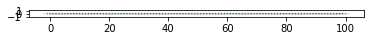

In [28]:
def onsite(site, xb1, xb2, Ub, Lb):
    (x,) = site.pos
    if( xb1-Lb/2 < x < xb1+Lb/2 or xb2-Lb/2 < x < xb2+Lb/2):
        return 2*t + Ub
    
    return 2*t


for i in range(N):
    sys[lat(i)] = onsite
    

sys[lat.neighbors()] = -t


leadl = kwant.Builder(kwant.TranslationalSymmetry((-a_nm,)))
leadl[lat(0)] = 2*t
leadl[lat.neighbors()] = -t

leadr = leadl.reversed()

sys.attach_lead(leadl)
sys.attach_lead(leadr)

    
kwant.plot(sys);

In [29]:
sysf = sys.finalized()

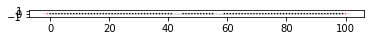

In [30]:
xb1 = 43
xb2 = 57
Lb = 4
Ub = 0.5*t
kwant.plot(sysf, site_color=lambda site: sysf.hamiltonian(site,site, params=dict(xb1=xb1, xb2=xb2, Ub=Ub, Lb=Lb)),colorbar=False);

In [31]:
def calc_transmission(syst, ene, xb1, xb2, Lb, Ub):
    smatrix = kwant.smatrix(syst, ene, params=dict(xb1=xb1, xb2=xb2, Ub=Ub, Lb=Lb))
    
    return smatrix.transmission(1,0)
    

In [37]:
NE = 800
Emin = 0.0001
Emax = 2*Ub

Etab = np.linspace(Emin, Emax, NE)
Ttab1 = np.zeros(NE)

for i in range(NE):
    Ttab1[i] =  calc_transmission(sysf, Etab[i], xb1, xb2, Lb, Ub)

Ub =  0.01904990994324977


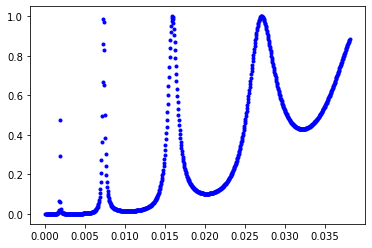

In [38]:
print("Ub = ", Ub)
plt.plot(Etab, Ttab1, "b.");

In [39]:
def plot_wf(i=0):
    ene = Emin + i*(Emax-Emin)/NE
    print("E = ", ene)
    wf = kwant.solvers.default.wave_function(sysf, ene, params=dict(xb1=xb1, xb2=xb2, Ub=Ub, Lb=Lb))
    plt.plot(np.abs(wf(0)[0])**2)
    plt.grid()

In [40]:
from ipywidgets import interact

In [41]:
interact(plot_wf, i=(0,NE))

interactive(children=(IntSlider(value=0, description='i', max=800), Output()), _dom_classes=('widget-interact'…

<function __main__.plot_wf(i=0)>